## Importing required libraries

In [13]:
from math import sin, cos, exp
from matplotlib import pyplot as plt
from PIL import Image 
import numpy as np

# **Question 1** 

In [14]:
def value(x, y):
    res = sin(0.1*x) + sin(0.2*x) + cos(0.4*x) + sin(((x*x + y*y)**0.5)*0.15) + sin(((x*x + y*y)**0.5)*0.35)
    return res

## Step 1

In [15]:
# An empty image of 512 x 512 pixels.
np_mat = np.zeros((1024, 1024))

# extra pixel created for padding the image with zeros(preventing the effects due to periodicity of the image (as taught in lectures))

## Step 2

In [16]:

m, n = np_mat.shape[0], np_mat.shape[1]
for x in range(512):
    for y in range(512):
            np_mat[y][x] = value(x, y)

## Step 3

In [17]:
# dft tranform of image.
fourier_transformed_img = np.fft.fft2(np_mat)

# shifting zero frequency to the center of the image.
shifted_img = np.fft.fftshift(fourier_transformed_img)

## Step 4

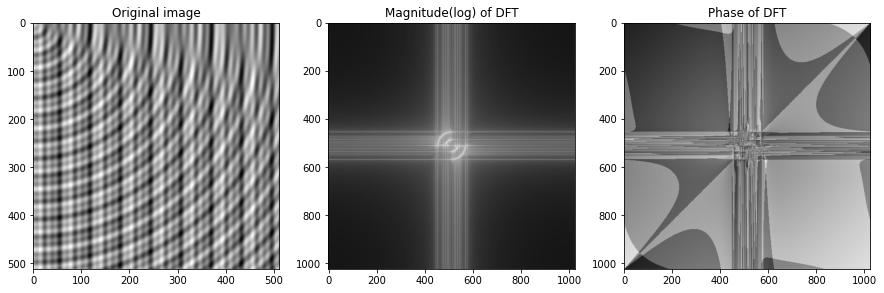

In [18]:
# magnitude of DFT
magnitude = np.abs(shifted_img)

# phase of DFT
phase = np.angle(shifted_img)

plt.figure(figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.title("Original image")
cropped_np_mat = np_mat[0:512, 0:512]
plt.imshow( cropped_np_mat , cmap = 'gray' )

plt.subplot(1, 3, 2)
plt.title("Magnitude(log) of DFT")
plt.imshow( np.log(magnitude), cmap = 'gray' )

plt.subplot(1, 3, 3)
plt.title("Phase of DFT")
plt.imshow( phase, cmap = 'gray' )

## Step 5

In [19]:
# Simply multiplying the shifted_img by 2, doubles the magnitude and has no effect on phase.
shifted_img = 2*shifted_img

# Inverse shifting modified img
inv_shifted_img = np.fft.ifftshift(shifted_img)

# Inverse fourier tranform
inv_fourier_transformed = np.fft.ifft2(inv_shifted_img)

## Step 6

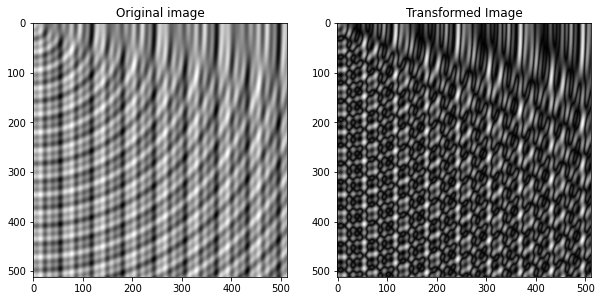

In [20]:
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow( cropped_np_mat , cmap = 'gray' )

plt.subplot(1, 2, 2)
plt.title("Transformed Image")
cropped_inv_fourier_transformed = inv_fourier_transformed[0:512, 0:512]
plt.imshow( np.abs(cropped_inv_fourier_transformed), cmap = 'gray' )

## Step 7

- In the transformed image all of the vertical bold lines(of original image) are converted to white lines
- In the original image there was some what strict pattern(straight lines) but in the transformed image there is some curvy pattern.
- In the transformed image some white pixel are converted to black from original image and vice-versa.

# **Question 2**

## Ideal Notch Filter

In [21]:
def IdealNotchFilter(shifted_mat, points, d0):
    p = len(points)
    for x in range(-d0, d0+1):
        for y in range(-d0, d0+1):
            for d in range(p):
                v0, u0 = points[d][0], points[d][1]
                shifted_mat[u0+x][v0+y] *= 0.0
    inv_shifted = np.fft.ifftshift(shifted_mat)
    inv_mat = np.fft.ifft2(inv_shifted)
    return inv_mat

## Gaussian Notch Filter

In [22]:
def GaussianNotchFilter(shifted_mat, points, d0):
    m, n, p = shifted_mat.shape[0], shifted_mat.shape[1], len(points)
    for u in range(m):
        for v in range(n):
            for d in range(p):
                u0, v0 = points[d][0], points[d][1]
                d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 0.5)
                d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 0.5)
                shifted_mat[u][v] *= (1 - exp(-0.5 * (d1 * d2 / pow(d0, 2))))
    inv_shifted = np.fft.ifftshift(shifted_mat)
    inv_mat = np.fft.ifft2(inv_shifted)
    return inv_mat

## **Filtering NoisyBall.png**

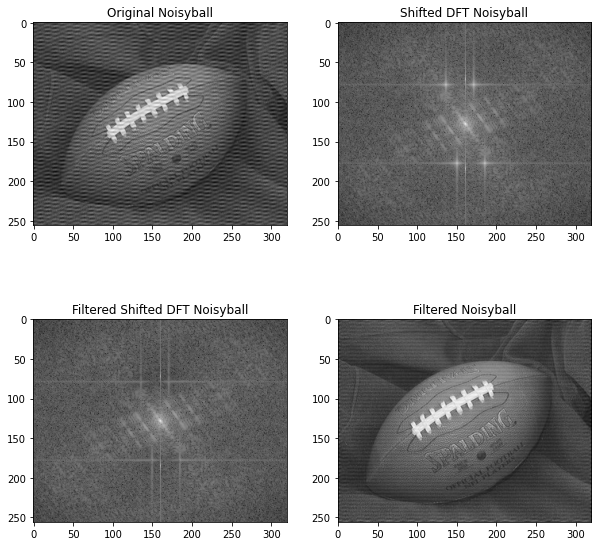

In [23]:

NoisyBall = Image.open('NoisyBall.png')

# converting to np array
np_mat_noisyball = np.array(NoisyBall)

dft_noisyball_mat = np.fft.fft2(np_mat_noisyball)

shifted_dft_noisyball_mat1 = np.fft.fftshift(dft_noisyball_mat)

# display original image and its shifted_dft
plt.figure( figsize= (10, 10))

plt.subplot(2, 2, 1)
plt.title("Original Noisyball")
plt.imshow( np_mat_noisyball , cmap = 'gray' )

plt.subplot(2, 2, 2)
plt.title("Shifted DFT Noisyball")
plt.imshow( np.log(1+np.abs(shifted_dft_noisyball_mat1)) , cmap = 'gray' )

points = [
    [78, 135.3], [78, 170.6], [177.8, 149.1], [177.8, 183.7],
]
transformed_np_mat3 = GaussianNotchFilter(shifted_dft_noisyball_mat1, points, 60.0)

diffpoints = [
    [69.7, 135.3], [69.7, 170.6], [183.3, 149.1], [180.2, 183.7]
]
transformed_np_mat4 = GaussianNotchFilter(shifted_dft_noisyball_mat1, diffpoints, 15.0)


plt.subplot(2, 2, 3)
plt.title("Filtered Shifted DFT Noisyball")
plt.imshow( np.log(1+np.abs(shifted_dft_noisyball_mat1)) , cmap = 'gray' )

plt.subplot(2, 2, 4)
plt.title("Filtered Noisyball")
plt.imshow( np.abs(transformed_np_mat4) , cmap = 'gray' )

## **Filtering HalftoneCar.png**

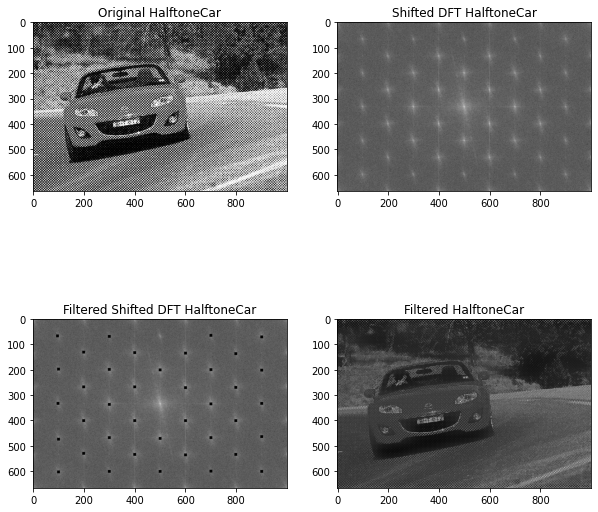

In [24]:
HalftoneCar = Image.open('HalftoneCar.png')

np_mat_halftoneCar = np.array(HalftoneCar)

dft_halftoneCar_mat = np.fft.fft2(np_mat_halftoneCar)

shifted_dft_halftoneCar_mat = np.fft.fftshift(dft_halftoneCar_mat)

# display original image and its shifted_dft
plt.figure( figsize= (10, 10))

plt.subplot(2, 2, 1)
plt.title("Original HalftoneCar")
plt.imshow( np_mat_halftoneCar , cmap = 'gray' )

plt.subplot(2, 2, 2)
plt.title("Shifted DFT HalftoneCar")
plt.imshow( np.log(1+np.abs(shifted_dft_halftoneCar_mat)) , cmap = 'gray' )

points = [
    [96, 66], [100, 197],[98, 332], [100, 473], [100, 602], [199, 130], [199, 267], [199, 400], [199, 529], [300, 68], [300, 198], [300, 336], [300, 467], [300, 600], [400, 132], [400, 267], [400, 400], [400, 533], [500, 200], [500, 470], [500, 600], [600, 134], [600, 270], [600, 400], [600, 535], [700, 64], [700, 199], [700, 334], [700, 467], [700, 599], [798, 136], [798, 269], [798, 400], [798, 533], [900, 70], [900, 201], [900, 332], [900, 463], [900, 600]
]
transformed_np_mat = IdealNotchFilter(shifted_dft_halftoneCar_mat, points, 5)

plt.subplot(2, 2, 3)
plt.title("Filtered Shifted DFT HalftoneCar")
plt.imshow( np.log(1+np.abs(shifted_dft_halftoneCar_mat)) , cmap = 'gray' )

plt.subplot(2, 2, 4)
plt.title("Filtered HalftoneCar")
plt.imshow( np.abs(transformed_np_mat) , cmap = 'gray' )